# Es 12.2

In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

In [2]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples


In [3]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255


In [4]:
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
    
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5),activation='relu',input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['acc'])
    return model

In [6]:
# training parameters
batch_size = 32
epochs = 5

# create the deep conv net
model_CNN=create_CNN()

# train CNN
history=model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.6859 - acc: 0.7741 - val_loss: 0.1686 - val_acc: 0.9493
Epoch 2/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1339 - acc: 0.9594 - val_loss: 0.0983 - val_acc: 0.9710
Epoch 3/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0861 - acc: 0.9735 - val_loss: 0.0668 - val_acc: 0.9796
Epoch 4/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0666 - acc: 0.9793 - val_loss: 0.0569 - val_acc: 0.9825
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0559 - acc: 0.9827

Test loss: 0.055871766060590744
Test accuracy: 0.982699990272522


313/313 [==============================] - 1s 4ms/step - loss: 0.0559 - acc: 0.9827

Test loss: 0.055871766060590744
Test accuracy: 0.982699990272522


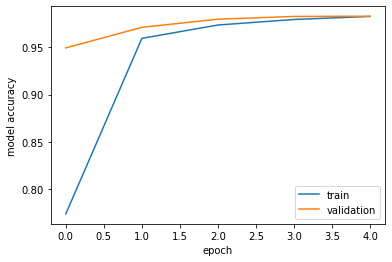

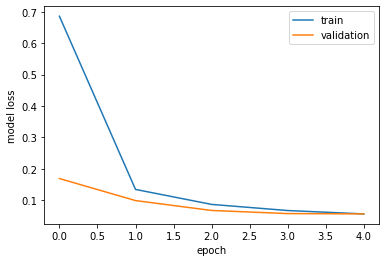

In [7]:
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.show()

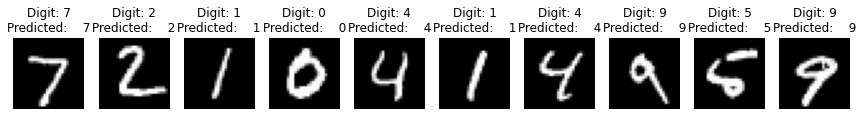

In [8]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(3, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

## Riconoscimento di immagini con cifre scritte da me

In [9]:
from PIL import Image
import os

digit_filename = "0.png"
digit_in = Image.open(digit_filename).convert('L')

ydim, xdim = digit_in.size
#print("Image size: "+str(xdim)+"x"+str(ydim))
pix=digit_in.load();
data = np.zeros((10,xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data[0,i,j]=pix[j,i]/255
        
digit_filename = "1.png"
digit_in = Image.open(digit_filename).convert('L')
pix=digit_in.load();
for j in range(ydim):
    for i in range(xdim):
        data[1,i,j]=pix[j,i]/255
        
digit_filename ="2.png"
digit_in = Image.open(digit_filename).convert('L')
pix=digit_in.load();
for j in range(ydim):
    for i in range(xdim):
        data[2,i,j]=pix[j,i]/255
        
digit_filename = "3.png"
digit_in = Image.open(digit_filename).convert('L')
pix=digit_in.load();
for j in range(ydim):
    for i in range(xdim):
        data[3,i,j]=pix[j,i]/255

        
digit_filename = "4.png"
digit_in = Image.open(digit_filename).convert('L')
pix=digit_in.load();
for j in range(ydim):
    for i in range(xdim):
        data[4,i,j]=pix[j,i]/255
        
digit_filename = "5.png"
digit_in = Image.open(digit_filename).convert('L')
pix=digit_in.load();
for j in range(ydim):
    for i in range(xdim):
        data[5,i,j]=pix[j,i]/255
        
digit_filename = "6.png"
digit_in = Image.open(digit_filename).convert('L')
pix=digit_in.load();
for j in range(ydim):
    for i in range(xdim):
        data[6,i,j]=pix[j,i]/255
        
digit_filename = "7.png"
digit_in = Image.open(digit_filename).convert('L')
pix=digit_in.load();
for j in range(ydim):
    for i in range(xdim):
        data[7,i,j]=pix[j,i]/255
        
digit_filename = "8.png"
digit_in = Image.open(digit_filename).convert('L')
pix=digit_in.load();
for j in range(ydim):
    for i in range(xdim):
        data[8,i,j]=pix[j,i]/255
        
digit_filename = "9.png"
digit_in = Image.open(digit_filename).convert('L')
pix=digit_in.load();
for j in range(ydim):
    for i in range(xdim):
        data[9,i,j]=pix[j,i]/255

In [10]:
if keras.backend.image_data_format() == 'channels_first':
    data = data.reshape(data.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    data = data.reshape(data.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


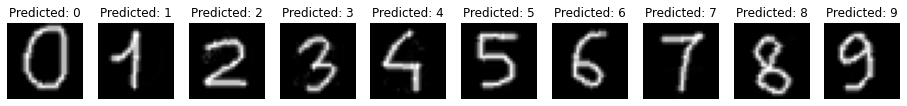

In [11]:
predictions = model_CNN.predict(data)
plt.figure(figsize=(16, 5)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(data[i, :, :, 0], cmap='gray')    
    plt.title("Predicted: {}".format(np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()